In [3]:
import pandas as pd #reading in csv
import seaborn as sns #vis
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import geopy #for mapping longitude,latitude
from geopy.geocoders import Nominatim

import json


# Info
y: accidents_2017.csv
air_qualityNov2017.csv
immigrantsbynation
population
unemployment

other sources?
weather, alcohol consumption

Min: ~5000

Preidct or by hour BY DAY (or by afternoon, morning, night) whether or not accidents will be greater than normal or less than normal 

 'Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí', Sants-Montjuic, 'Sarrià-Sant Gervasi

X: Datetime
Features: Part of Day, Air quality, District Name, Unemployment Rate,
Features (Maybe): Population, Bus stops 
Y: # of accidents

Barcelona - Poblenou --> Sants Marti YES

Barcelona - Sants --> Sants Monjuic YES

Barcelona - Eixample --> Eixample YES

Barcelona - Gracia --> Gracia YES

Barcelona - Eixample --> Eixample YES

Barcelona - Ciutadella  --> Ciuta Della YES

Barcelona - Palau Reial --> Les Corts YES

In [4]:
acc = pd.read_csv('barcelona-data-sets/accidents_2017.csv')


In [5]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [6]:
#acc['District Name']
acc['Part of the day'].value_counts()

Afternoon    5082
Morning      4067
Night        1190
Name: Part of the day, dtype: int64

In [7]:
def render_json(loc):
    #prettifies json from input location from geopy
    output = json.dumps(loc.raw, indent=2)
    line_list = output.split("\n")  # Sort of line replacing "\n" with a new line
    # Now that our obj is a list of strings leverage print's automatic newline
    for line in line_list:
        print(line)
    

In [8]:
def find_loc(long,lat):
    geolocator = Nominatim()
    loc = geolocator.reverse(lat,long) #(latitude, longitude) from unemployment or accidents
    print(loc.raw["address"])

# EDA

In [9]:
acc['District Name'].value_counts()

Eixample               3029
Sant Martí             1336
Sarrià-Sant Gervasi    1104
Sants-Montjuïc         1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Unknown                  27
Name: District Name, dtype: int64

Ciutat Vella = 600

'Eixample', = 3029

'Gràcia', = 531

'Horta-Guinardó', = 743

'Les Corts', = 726

'Nou Barris', = 542

'Sant Andreu', = 597

'Sant Martí', = 1136

 Sants-Montjuic, = 1104
 
'Sarrià-Sant Gervasi = 1104

Unknown = 27

Found using len(acc.loc[acc['District Name'] == 'Ciutat Vella' ])

In [10]:
len(acc.loc[acc['District Name'] == 'Eixample' ])

3029

In [11]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


# Converting Dates to Dataframe (Test)

In [12]:
# Format is always Y-M-D H:M:S
#has month/day/hour/year NO MINUTE 

acc['Datetime']  = (pd.to_datetime('2017' + '-' +
                                  acc['Month'].astype(str) + '-' +
                                  acc['Day'].astype(str) + ' ' +
                                  acc['Hour'].astype(str)+':00:00'))

In [13]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


In [14]:
acc['Datetime'].head()

0   2017-10-13 08:00:00
1   2017-09-01 13:00:00
2   2017-12-08 21:00:00
3   2017-07-21 02:00:00
4   2017-05-25 14:00:00
Name: Datetime, dtype: datetime64[ns]

In [15]:
#acc.drop(columns=['Month','Day','Hour','Street','Neighborhood Name']).to_csv('acc_datetime.csv')

In [16]:
#acc = acc.set_index('Datetime')
#acc.index

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


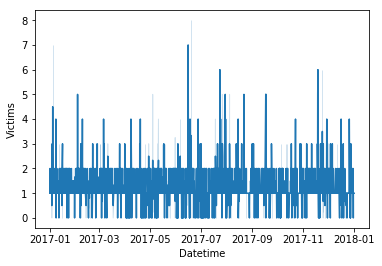

In [17]:
#ax = sns.lineplot(x="Datetime", y="Victims", hue='District Name', data=acc)
ax = sns.lineplot(x='Datetime', y="Victims", data=acc.loc[acc['District Name'] == 'Eixample' ])

In [18]:
#DO IT BY DAY 
acc.index.value_counts()
#acc.loc['2017-01-01':'2017-01-02']


2047    1
7545    1
9558    1
3411    1
1362    1
7505    1
5456    1
9550    1
3403    1
1354    1
7497    1
5448    1
9542    1
3395    1
1346    1
7489    1
5440    1
9534    1
3387    1
5464    1
7513    1
1370    1
1386    1
9590    1
3443    1
1394    1
7537    1
5488    1
9582    1
3435    1
       ..
2692    1
2708    1
8833    1
4735    1
6782    1
637     1
2684    1
8825    1
4727    1
8849    1
661     1
8881    1
677     1
4783    1
6830    1
685     1
2732    1
8873    1
4775    1
6822    1
2724    1
6806    1
8865    1
4767    1
6814    1
669     1
2716    1
8857    1
4759    1
0       1
Length: 10339, dtype: int64

In [19]:
acc.loc['2017-1-1 01:00:00':'2017-1-2 01:00:00']


,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime


In [20]:
acc.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045,2017-10-13 08:00:00
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426,2017-09-01 13:00:00
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885,2017-12-08 21:00:00
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668,2017-07-21 02:00:00
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365,2017-05-25 14:00:00


# Air Quality

Generated all during November 2017

In [21]:
#read airquality
AQ = pd.read_csv('barcelona-data-sets/air_quality_Nov2017.csv')

In [22]:
AQ.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


In [23]:
#find which district these stations lie in
AQ.loc[AQ['Station'] == 'Barcelona - Palau Reial' ]

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
5,Barcelona - Palau Reial,Good,2.1151,41.3875,23h,Good,11.0,23h,Good,57.0,23h,Good,23.0,01/11/2018 0:00,1541027104
13,Barcelona - Palau Reial,Good,2.1151,41.3875,0h,Good,27.0,0h,Good,38.0,1h,Good,24.0,01/11/2018 1:00,1541030725
21,Barcelona - Palau Reial,Good,2.1151,41.3875,1h,Good,34.0,1h,Good,28.0,2h,Good,24.0,01/11/2018 2:00,1541034303
29,Barcelona - Palau Reial,Good,2.1151,41.3875,2h,Good,38.0,2h,Good,19.0,3h,Good,24.0,01/11/2018 3:00,1541037902
37,Barcelona - Palau Reial,Good,2.1151,41.3875,3h,Good,57.0,3h,Good,7.0,4h,Good,23.0,01/11/2018 4:00,1541041503
45,Barcelona - Palau Reial,Good,2.1151,41.3875,4h,Good,48.0,4h,Good,8.0,5h,Good,21.0,01/11/2018 5:00,1541045102
53,Barcelona - Palau Reial,Good,2.1151,41.3875,5h,Good,41.0,5h,Good,11.0,6h,Good,17.0,01/11/2018 6:00,1541048703
61,Barcelona - Palau Reial,Good,2.1151,41.3875,6h,Good,28.0,6h,Good,17.0,7h,Good,15.0,01/11/2018 7:00,1541052302
69,Barcelona - Palau Reial,Good,2.1151,41.3875,7h,Good,10.0,7h,Good,34.0,8h,Good,13.0,01/11/2018 8:00,1541055903
77,Barcelona - Palau Reial,Good,2.1151,41.3875,8h,Good,7.0,8h,Good,36.0,9h,Good,12.0,01/11/2018 9:00,1541059503


In [32]:
AQ['Station'].value_counts()

Barcelona - Eixample        718
Barcelona - Observ Fabra    718
Barcelona - Sants           718
Barcelona - Poblenou        718
Barcelona - Vall Hebron     718
Barcelona - Ciutadella      718
Barcelona - Palau Reial     718
Barcelona - Gràcia          718
Name: Station, dtype: int64

In [35]:
AQ['Generated'].value_counts()

15/11/2018 14:00    16
15/11/2018 12:00    16
15/11/2018 18:00    16
02/11/2018 12:00    16
23/11/2018 19:00     8
21/11/2018 17:00     8
09/11/2018 7:00      8
27/11/2018 15:00     8
06/11/2018 10:00     8
06/11/2018 17:00     8
17/11/2018 18:00     8
11/11/2018 12:00     8
12/11/2018 20:00     8
21/11/2018 8:00      8
08/11/2018 2:00      8
30/11/2018 9:00      8
23/11/2018 18:00     8
11/11/2018 7:00      8
19/11/2018 9:00      8
28/11/2018 3:00      8
17/11/2018 23:00     8
15/11/2018 5:00      8
22/11/2018 1:00      8
12/11/2018 10:00     8
11/11/2018 8:00      8
03/11/2018 4:00      8
17/11/2018 17:00     8
24/11/2018 12:00     8
05/11/2018 22:00     8
29/11/2018 20:00     8
                    ..
14/11/2018 5:00      8
22/11/2018 14:00     8
28/11/2018 8:00      8
04/11/2018 17:00     8
06/11/2018 9:00      8
06/11/2018 5:00      8
03/11/2018 15:00     8
12/11/2018 21:00     8
14/11/2018 16:00     8
14/11/2018 2:00      8
02/11/2018 2:00      8
06/11/2018 3:00      8
23/11/2018 

In [ ]:
# convert generated to pandas datetime

acc['Datetime']  = (pd.to_datetime('2017' + '-' +
                                  acc['Month'].astype(str) + '-' +
                                  acc['Day'].astype(str) + ' ' +
                                  acc['Hour'].astype(str)+':00:00'))

In [34]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 15 columns):
Station         5744 non-null object
Air Quality     5744 non-null object
Longitude       5744 non-null float64
Latitude        5744 non-null float64
O3 Hour         4268 non-null object
O3 Quality      4268 non-null object
O3 Value        4101 non-null float64
NO2 Hour        5689 non-null object
NO2 Quality     5689 non-null object
NO2 Value       5460 non-null float64
PM10 Hour       3722 non-null object
PM10 Quality    3722 non-null object
PM10 Value      3647 non-null float64
Generated       5744 non-null object
Date Time       5744 non-null int64
dtypes: float64(5), int64(1), object(9)
memory usage: 673.2+ KB


In [ ]:
# scatterplot of points
#lat = x
#long = y
ax = sns.scatterplot(x='Longitude',y='Latitude',data=acc)


In [ ]:
ax = sns.scatterplot(x='Longitude',y='Latitude',data=AQ)


Barcelona - Observ Fabra --> some observatory in a benedictine temple???
Barcelona - Poblenou --> Sants Marti
Barcelona - Sants --> Sants Monjuic
Barcelona - Eixample --> Eixample
Barcelona - Gracia --> Gracia
Barcelona - Vall Hebron --> La Val D'Hebron
Barcelona - Eixample --> Eixample
Barcelona - Ciutadella  --> Ciuta Della
Barcelona - Palau Reial --> Les Corts

In [ ]:
AQ[0:10]

In [ ]:
print(loc.raw["address"]["city_district"])

# Unemployment

In [28]:
unemployment = pd.read_csv('barcelona-data-sets/unemployment.csv')

In [31]:
unemployment['District Name'].value_counts()

Nou Barris             2496
Horta-Guinardó         2112
Sant Martí             1920
Sants-Montjuïc         1536
Sant Andreu            1344
Eixample               1152
Sarrià-Sant Gervasi    1152
Gràcia                  960
Ciutat Vella            768
Les Corts               576
No consta               192
Name: District Name, dtype: int64

In [ ]:
ax = sns.barplot(x="Number", y="District Name", data=unemployment)

In [ ]:
unemployment.head()

In [ ]:
unemployment['Demand_occupation'].value_counts()

In [ ]:
unemployment.loc[unemployment['Demand_occupation'] == 'Registered unemployed']

In [ ]:
unemployment['Month'].value_counts()

In [ ]:
ax = sns.barplot(x="Neighborhood Name", y="Number", data=unemployment)

In [ ]:
unemployment['Neighborhood Name']
#conclusion - too many neighbor hood name, must do by district

In [ ]:
acc['District Name'].value_counts()


In [ ]:
unemployment['District Name'].value_counts()


 we have 10 similar districts: 
 Ciutat Vella', 
'Eixample', 
'Gràcia',
'Horta-Guinardó', 
'Les Corts', 
'Nou Barris',
'Sant Andreu', 
'Sant Martí',
Sants-Montjuic,
'Sarrià-Sant Gervasi, 
(no consta = does not include = acc[unknow]


# Mapping to city district with latitude longitude

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
loc = geolocator.reverse("41.416365,2.185272") #(latitude, longitude) from unemployment or accidents
print(loc.raw)

In [ ]:
render_json(loc)

In [ ]:
d = []

In [ ]:
for index, row in AQ.iterrows():
    #print(row['Latitude'], row['Longitude'])
    geolocator = Nominatim()
    loc = geolocator.reverse(row['Latitude'],row['Longitude']) #(latitude, longitude)
    render_json(loc)
    print(loc.raw["address"])
#loop through each long,lat pair 
#find district name with geolocator
#append to dictionary
#find how many districts


# Population

In [36]:
pop = pd.read_csv('barcelona-data-sets/population.csv')

In [50]:
pop.loc[(pop['District.Name'] == 'Eixample')& (pop['Year'] == 2017)] 
# 1152 rows 
# can use this to derive # of teen drivers

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124
5,2017,2,Eixample,6,la Sagrada Família,Male,0-4,191
6,2017,2,Eixample,7,la Dreta de l'Eixample,Male,0-4,176
7,2017,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Male,0-4,158
8,2017,2,Eixample,9,la Nova Esquerra de l'Eixample,Male,0-4,220
9,2017,2,Eixample,10,Sant Antoni,Male,0-4,143
77,2017,2,Eixample,5,el Fort Pienc,Male,0-4,149
78,2017,2,Eixample,6,la Sagrada Família,Male,0-4,196
79,2017,2,Eixample,7,la Dreta de l'Eixample,Male,0-4,213
80,2017,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Male,0-4,182


In [51]:
pop['Age'].value_counts()

85-89    3650
75-79    3650
40-44    3650
60-64    3650
20-24    3650
35-39    3650
25-29    3650
30-34    3650
80-84    3650
90-94    3650
5-9      3650
15-19    3650
10-14    3650
50-54    3650
55-59    3650
65-69    3650
70-74    3650
0-4      3650
45-49    3650
>=95      730
Name: Age, dtype: int64

In [49]:
pop.loc[pop['District.Name'] == 'Eixample'].loc[pop['Year']== 2017]

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124
5,2017,2,Eixample,6,la Sagrada Família,Male,0-4,191
6,2017,2,Eixample,7,la Dreta de l'Eixample,Male,0-4,176
7,2017,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Male,0-4,158
8,2017,2,Eixample,9,la Nova Esquerra de l'Eixample,Male,0-4,220
9,2017,2,Eixample,10,Sant Antoni,Male,0-4,143
77,2017,2,Eixample,5,el Fort Pienc,Male,0-4,149
78,2017,2,Eixample,6,la Sagrada Família,Male,0-4,196
79,2017,2,Eixample,7,la Dreta de l'Eixample,Male,0-4,213
80,2017,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Male,0-4,182


# how to correlate features
Same District
Same date (at the very least) 
- unemployment is only by year and month
- air quality is only by m/d/y 
- # accidents is by m d no year (year is ONLY 2017) 
- aq and acc can be ampped by district and time


# Eixample Only Dataset

In [25]:
acc.loc[acc['District Name'] == 'Eixample' ]

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime
241,2017S005097,Eixample,Sant Antoni,Corts Catalanes / Vilamarí ...,Saturday,June,10,16,Afternoon,1,0,1,2,2.151780,41.377044,2017-06-10 16:00:00
244,2017S009475,Eixample,Sant Antoni,Paral·lel / Floridablanca ...,Wednesday,November,15,17,Afternoon,1,0,1,2,2.154167,41.375000,2017-11-15 17:00:00
246,2017S001793,Eixample,Sant Antoni,AV PARAL·LEL ...,Saturday,March,4,19,Afternoon,1,0,1,2,2.152588,41.374777,2017-03-04 19:00:00
247,2017S007234,Eixample,Sant Antoni,Rocafort / Sepúlveda ...,Tuesday,August,29,17,Afternoon,2,0,2,2,2.155303,41.377779,2017-08-29 17:00:00
248,2017S002206,Eixample,Sant Antoni,ENTENÇA / Sepúlveda ...,Sunday,March,19,11,Morning,1,0,1,2,2.154165,41.376925,2017-03-19 11:00:00
249,2017S006779,Eixample,Sant Antoni,Corts Catalanes ...,Saturday,August,5,11,Morning,1,0,1,2,2.154021,41.378379,2017-08-05 11:00:00
252,2017S003566,Eixample,la Nova Esquerra de l'Eixample,Aragó / Rocafort ...,Friday,April,21,14,Afternoon,1,0,1,2,2.150539,41.381379,2017-04-21 14:00:00
253,2017S007209,Eixample,la Nova Esquerra de l'Eixample,Calàbria ...,Monday,August,28,7,Morning,0,0,0,5,2.151126,41.382784,2017-08-28 07:00:00
254,2017S010000,Eixample,la Nova Esquerra de l'Eixample,Viladomat / Diputació ...,Thursday,November,30,19,Afternoon,3,0,3,4,2.155061,41.381374,2017-11-30 19:00:00
255,2017S008905,Eixample,la Nova Esquerra de l'Eixample,Mallorca / Calàbria ...,Friday,October,27,16,Afternoon,2,0,2,2,2.149400,41.383924,2017-10-27 16:00:00


In [26]:
AQ.loc[AQ['Station'] == 'Barcelona - Eixample']

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
9,Barcelona - Eixample,Good,2.1538,41.3853,0h,Good,6.0,0h,Good,80.0,1h,Good,35.0,01/11/2018 1:00,1541030725
17,Barcelona - Eixample,Good,2.1538,41.3853,1h,Good,14.0,1h,Good,64.0,1h,Good,34.0,01/11/2018 2:00,1541034303
25,Barcelona - Eixample,Good,2.1538,41.3853,2h,Good,32.0,2h,Good,44.0,3h,Good,35.0,01/11/2018 3:00,1541037902
33,Barcelona - Eixample,Good,2.1538,41.3853,3h,Good,43.0,3h,Good,34.0,4h,Good,34.0,01/11/2018 4:00,1541041503
41,Barcelona - Eixample,Good,2.1538,41.3853,4h,Good,45.0,4h,Good,26.0,4h,Good,33.0,01/11/2018 5:00,1541045102
49,Barcelona - Eixample,Good,2.1538,41.3853,5h,Good,37.0,5h,Good,31.0,6h,Good,27.0,01/11/2018 6:00,1541048703
57,Barcelona - Eixample,Good,2.1538,41.3853,6h,Good,24.0,6h,Good,37.0,7h,Good,25.0,01/11/2018 7:00,1541052302
65,Barcelona - Eixample,Good,2.1538,41.3853,7h,Good,18.0,7h,Good,42.0,7h,Good,24.0,01/11/2018 8:00,1541055903
73,Barcelona - Eixample,Good,2.1538,41.3853,8h,Good,6.0,8h,Good,52.0,9h,Good,21.0,01/11/2018 9:00,1541059503


In [33]:
AQ['Generated'].value_counts()

15/11/2018 14:00    16
15/11/2018 12:00    16
15/11/2018 18:00    16
02/11/2018 12:00    16
23/11/2018 19:00     8
21/11/2018 17:00     8
09/11/2018 7:00      8
27/11/2018 15:00     8
06/11/2018 10:00     8
06/11/2018 17:00     8
17/11/2018 18:00     8
11/11/2018 12:00     8
12/11/2018 20:00     8
21/11/2018 8:00      8
08/11/2018 2:00      8
30/11/2018 9:00      8
23/11/2018 18:00     8
11/11/2018 7:00      8
19/11/2018 9:00      8
28/11/2018 3:00      8
17/11/2018 23:00     8
15/11/2018 5:00      8
22/11/2018 1:00      8
12/11/2018 10:00     8
11/11/2018 8:00      8
03/11/2018 4:00      8
17/11/2018 17:00     8
24/11/2018 12:00     8
05/11/2018 22:00     8
29/11/2018 20:00     8
                    ..
14/11/2018 5:00      8
22/11/2018 14:00     8
28/11/2018 8:00      8
04/11/2018 17:00     8
06/11/2018 9:00      8
06/11/2018 5:00      8
03/11/2018 15:00     8
12/11/2018 21:00     8
14/11/2018 16:00     8
14/11/2018 2:00      8
02/11/2018 2:00      8
06/11/2018 3:00      8
23/11/2018 

In [30]:
unemployment.loc[unemployment['District Name'] == 'Eixample']

,Year,Month,District Code,District Name,Neighborhood Code,Neighborhood Name,Gender,Demand_occupation,Number
4,2017,January,2,Eixample,5,el Fort Pienc,Male,Registered unemployed,630
5,2017,January,2,Eixample,6,la Sagrada Família,Male,Registered unemployed,1032
6,2017,January,2,Eixample,7,la Dreta de l'Eixample,Male,Registered unemployed,655
7,2017,January,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Male,Registered unemployed,751
8,2017,January,2,Eixample,9,la Nova Esquerra de l'Eixample,Male,Registered unemployed,1128
9,2017,January,2,Eixample,10,Sant Antoni,Male,Registered unemployed,847
78,2017,January,2,Eixample,5,el Fort Pienc,Male,Unemployment demand,183
79,2017,January,2,Eixample,6,la Sagrada Família,Male,Unemployment demand,302
80,2017,January,2,Eixample,7,la Dreta de l'Eixample,Male,Unemployment demand,167
81,2017,January,2,Eixample,8,l'Antiga Esquerra de l'Eixample,Male,Unemployment demand,177


# Weather

In [56]:
weather = pd.read_csv('data/weather_2017.csv')

In [57]:
weather.head()

,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Date,State Holiday
0,12:00 AM,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
1,12:30 AM,45 F,39 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
2,1:00 AM,43 F,37 F,81 %,NW,10 mph,0 mph,30.4 in,1/1,1
3,1:30 AM,43 F,37 F,81 %,NW,9 mph,0 mph,30.4 in,1/1,1
4,2:00 AM,43 F,37 F,81 %,NW,9 mph,0 mph,30.3 in,1/1,1


In [ ]:
# Making a datetime
# Format is always Y-M-D H:M:S
#has month/day/hour/year NO MINUTE 

acc['Datetime']  = (pd.to_datetime('2017' + '-' +
                                  acc['Date'].astype(str) + '-' +
                                  acc['Day'].astype(str) + ' ' +
                                  acc['Hour'].astype(str)+':00:00'))

# Making Training/Testing Set

In [53]:
acc = pd.read_csv('barcelona-data-sets/acc_datetime.csv')

In [54]:
acc.sort_values(by=['Datetime'])

,Datetime,Id,District Name,Weekday,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,Datetime.1
3087,2017-01-01 02:00:00,2017S000002,Eixample,Sunday,Night,1,0,1,2,2.182376,41.399680,2017-01-01 02:00:00
872,2017-01-01 04:00:00,2017S000001,Sarrià-Sant Gervasi,Sunday,Night,1,0,1,1,2.151330,41.400771,2017-01-01 04:00:00
4930,2017-01-01 06:00:00,2017S000003,Horta-Guinardó,Sunday,Morning,0,0,0,1,2.166464,41.412769,2017-01-01 06:00:00
9187,2017-01-01 07:00:00,2017S000005,Sant Martí,Sunday,Morning,2,0,2,3,2.193249,41.397908,2017-01-01 07:00:00
1585,2017-01-01 07:00:00,2017S000004,Eixample,Sunday,Morning,1,0,1,2,2.157359,41.393310,2017-01-01 07:00:00
322,2017-01-01 10:00:00,2017S000008,Eixample,Sunday,Morning,2,0,2,2,2.166376,41.393276,2017-01-01 10:00:00
600,2017-01-01 10:00:00,2017S000012,Eixample,Sunday,Morning,2,0,2,2,2.184624,41.401695,2017-01-01 10:00:00
5294,2017-01-01 11:00:00,2017S000006,Ciutat Vella,Sunday,Morning,1,0,1,1,2.165199,41.385158,2017-01-01 11:00:00
1323,2017-01-01 12:00:00,2017S000021,Sant Martí,Sunday,Morning,0,0,0,4,2.211914,41.415181,2017-01-01 12:00:00
6343,2017-01-01 12:00:00,2017S000010,Sant Andreu,Sunday,Morning,1,0,1,1,2.183972,41.423153,2017-01-01 12:00:00


In [61]:
# https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
# Makes Datetime unique and adds column for count (ie # accidents) 
value_counts = acc['Datetime'].value_counts(dropna=True, sort=True)

df = value_counts.rename_axis('unique_values').to_frame('counts')
print (df)

                     counts
unique_values              
2017-10-31 14:00:00       9
2017-10-23 18:00:00       8
2017-09-22 15:00:00       8
2017-01-13 14:00:00       8
2017-06-13 18:00:00       8
2017-06-26 16:00:00       8
2017-05-19 20:00:00       8
2017-01-17 12:00:00       8
2017-03-23 08:00:00       8
2017-06-13 09:00:00       7
2017-07-13 13:00:00       7
2017-05-31 09:00:00       7
2017-10-20 16:00:00       7
2017-05-15 16:00:00       7
2017-03-20 19:00:00       7
2017-02-14 08:00:00       7
2017-06-06 16:00:00       7
2017-12-19 13:00:00       7
2017-07-07 13:00:00       7
2017-06-30 17:00:00       7
2017-09-12 09:00:00       7
2017-11-07 14:00:00       7
2017-07-05 16:00:00       7
2017-03-24 18:00:00       7
2017-10-04 18:00:00       7
2017-07-05 17:00:00       7
2017-07-24 13:00:00       7
2017-07-05 12:00:00       7
2017-11-22 08:00:00       7
2017-03-20 09:00:00       7
...                     ...
2017-05-22 06:00:00       1
2017-05-06 15:00:00       1
2017-06-06 17:00:00 

In [58]:
#80 20 split

#10339 -> 
# 80% = 8271 samples
# 20% = 2068 samples


10339

In [ ]:
# doing counts per hour
# day and hour is the same


In [1]:
# time series 
# regression (mean squared)
# % that the # of accidnets will be > 5 for example 
# or greater than the mean PER district


# Models

In [ ]:
# Random Forest
# ARIMA
# LSTM

# Evaluation

In [ ]:
#mean squared error